In [1]:
# importing liabraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
# Here is where you import the k-means algorithm from scikit-learn.
from sklearn.cluster import KMeans 
# PyLab is a convenience module that bulk imports matplotlib.
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to \"call\" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\rekha\OneDrive\Documents\Billionaires data'

In [8]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'billionaires_data_maps.csv'), index_col = False)

In [9]:
df.shape

(2639, 30)

In [15]:
df.describe()

,Unnamed: 0,FinalWorth,Age,Birth Year,Birth Month,Birthday,CPI Country,CPI ChangeCountry,GDP_Country,Gross_Tertiarye_Education_Enrollment,Gross_Primary_Education_Enrollment_Country,Life_Expectancy_Country,Tax_Revenue_Country,Total_TaxRate_Country,Population_Country,Latitude Country,Longitude Country,Number of Billionaires
count,2639.000000,2639.000000,2574.000000,2563.000000,2563.000000,2563.000000,2456.000000,2456.000000,2.476000e+03,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000,2601.000000
mean,1319.000000,4614.361501,65.128594,1957.194694,5.742099,12.093250,127.755204,4.364169,1.158287e+13,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156,1.001538
std,761.958004,9824.168449,13.247596,13.272586,3.709627,9.915189,26.452951,3.623763,9.575588e+12,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989,0.039193
min,0.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,3.154058e+09,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771,1.000000
25%,659.500000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,1.736426e+12,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891,1.000000
50%,1319.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,1.991000e+13,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526,1.000000
75%,1978.500000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,2.142770e+13,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397,1.000000
max,2638.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,2.142770e+13,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971,2.000000


In [16]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [17]:
df.describe()

,FinalWorth,Age,Birth Year,Birth Month,Birthday,CPI Country,CPI ChangeCountry,GDP_Country,Gross_Tertiarye_Education_Enrollment,Gross_Primary_Education_Enrollment_Country,Life_Expectancy_Country,Tax_Revenue_Country,Total_TaxRate_Country,Population_Country,Latitude Country,Longitude Country,Number of Billionaires
count,2639.000000,2574.000000,2563.000000,2563.000000,2563.000000,2456.000000,2456.000000,2.476000e+03,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000,2601.000000
mean,4614.361501,65.128594,1957.194694,5.742099,12.093250,127.755204,4.364169,1.158287e+13,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156,1.001538
std,9824.168449,13.247596,13.272586,3.709627,9.915189,26.452951,3.623763,9.575588e+12,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989,0.039193
min,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,3.154058e+09,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771,1.000000
25%,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,1.736426e+12,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891,1.000000
50%,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,1.991000e+13,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526,1.000000
75%,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,2.142770e+13,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397,1.000000
max,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,2.142770e+13,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971,2.000000


In [18]:
df.columns

Index(['FinalWorth', 'Person Name', 'Age', 'country', 'City', 'source',
       'Industries', 'Country_Of_Citizenship', 'Self_Made', 'Status', 'Gender',
       'State', 'Residence_State_Region', 'Birth Year', 'Birth Month',
       'Birthday', 'CPI Country', 'CPI ChangeCountry', 'GDP_Country',
       'Gross_Tertiarye_Education_Enrollment',
       'Gross_Primary_Education_Enrollment_Country', 'Life_Expectancy_Country',
       'Tax_Revenue_Country', 'Total_TaxRate_Country', 'Population_Country',
       'Latitude Country', 'Longitude Country', 'Population_Category',
       'Number of Billionaires'],
      dtype='object')

In [20]:
# creating subset with numerical columns

df_2 = df[['FinalWorth', 'Age', 'CPI Country', 'CPI ChangeCountry', 'GDP_Country', 'Gross_Tertiarye_Education_Enrollment', 'Gross_Primary_Education_Enrollment_Country', 'Life_Expectancy_Country', 'Tax_Revenue_Country', 'Total_TaxRate_Country', 'Population_Country', 'Latitude Country', 'Longitude Country', 'Number of Billionaires']]

In [21]:
df_2

,FinalWorth,Age,CPI Country,CPI ChangeCountry,GDP_Country,Gross_Tertiarye_Education_Enrollment,Gross_Primary_Education_Enrollment_Country,Life_Expectancy_Country,Tax_Revenue_Country,Total_TaxRate_Country,Population_Country,Latitude Country,Longitude Country,Number of Billionaires
0,211000,74.0,110.05,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749,1.0
1,180000,51.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1.0
2,114000,59.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1.0
3,107000,78.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1.0
4,106000,92.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,1000,51.0,125.08,2.9,1.991000e+13,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,1.0
2635,1000,80.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891,1.0
2636,1000,60.0,125.08,2.9,1.991000e+13,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,1.0
2637,1000,71.0,125.08,2.9,1.991000e+13,50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397,1.0


## 2. The elbow technique

In [49]:
 # Defines the range of potential clusters in the data.
    
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above

kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [50]:
df_2.dtypes

FinalWorth                                      int64
Age                                           float64
CPI Country                                   float64
CPI ChangeCountry                             float64
GDP_Country                                   float64
Gross_Tertiarye_Education_Enrollment          float64
Gross_Primary_Education_Enrollment_Country    float64
Life_Expectancy_Country                       float64
Tax_Revenue_Country                           float64
Total_TaxRate_Country                         float64
Population_Country                            float64
Latitude Country                              float64
Longitude Country                             float64
Number of Billionaires                        float64
dtype: object

In [54]:
# Creates a score that represents
    
score = [kmeans[i].fit(df_3).score(df_3) for i in range(len(kmeans))] 

# a rate of variation for the given cluster option.
    
score

C:\Users\rekha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rekha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rekha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rekha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-2.4745526795964356e+29,
 -3.0503351902085747e+27,
 -1.3873652300407726e+27,
 -6.760629163016979e+26,
 -2.6186100297378102e+26,
 -1.154490754674931e+26,
 -7.314417186245044e+25,
 -3.898755049280984e+25,
 -1.9116459742255688e+25]

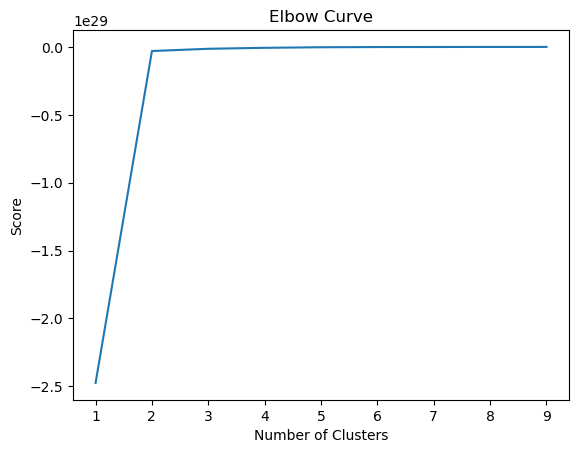

In [55]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

 In this example, there's a sharp edge at 2 on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is two.

## 3. k-means clustering

In [56]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 

In [57]:
# Fit the k-means object to the data.

kmeans.fit(df_3)

C:\Users\rekha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [58]:
df_3['clusters'] = kmeans.fit_predict(df_3)

C:\Users\rekha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:
df_3.head()

,FinalWorth,Age,CPI Country,CPI ChangeCountry,GDP_Country,Gross_Tertiarye_Education_Enrollment,Gross_Primary_Education_Enrollment_Country,Life_Expectancy_Country,Tax_Revenue_Country,Total_TaxRate_Country,Population_Country,Latitude Country,Longitude Country,Number of Billionaires,clusters
0,211000,74.0,110.05,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,1.0,0
1,180000,51.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,1.0,1
2,114000,59.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,1.0,1
3,107000,78.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,1.0,1
4,106000,92.0,117.24,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,1.0,1


In [60]:
df_3['clusters'].value_counts()

clusters
0    1362
1    1277
Name: count, dtype: int64

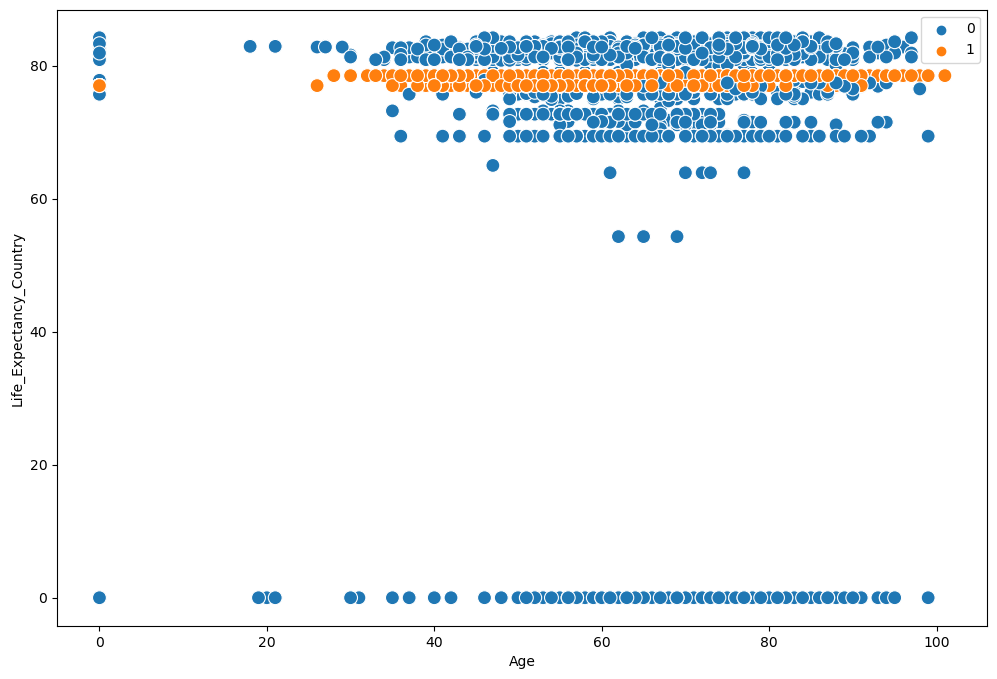

In [61]:
# Plot the clusters for the \"Age\" and \"Life_Expectancy_Country\" variables.
    
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_3['Age'], y=df_3['Life_Expectancy_Country'], hue=kmeans.labels_, s=100)

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
 
# This removes the grid from the background.    
ax.grid(False)

# Label x-axis.
plt.xlabel('Age')

# Label y-axis.
plt.ylabel('Life_Expectancy_Country')

plt.show()

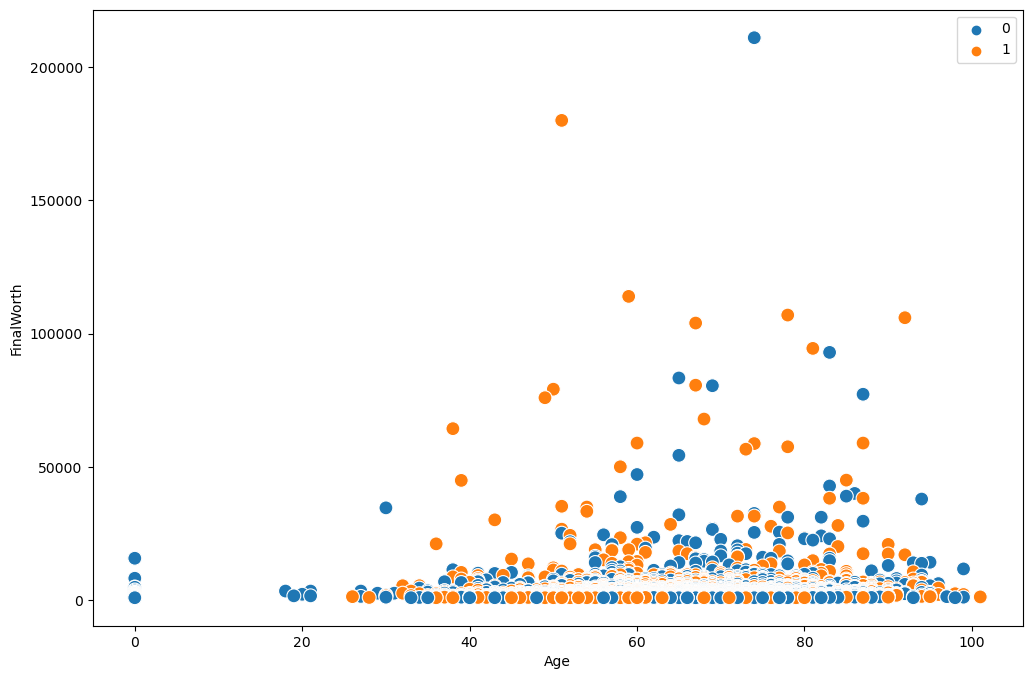

In [62]:
# Plot the clusters for the \"Age\" and \"Life_Expectancy_Country\" variables.
    
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_3['Age'], y=df_3['FinalWorth'], hue=kmeans.labels_, s=100)

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
 
# This removes the grid from the background.    
ax.grid(False)

# Label x-axis.
plt.xlabel('Age')

# Label y-axis.
plt.ylabel('FinalWorth')

plt.show()

In [64]:
df.groupby('cluster').agg({'Age':['mean', 'median'], 
                          'FinalWorth':['mean', 'median'], 
                          'Age':['mean', 'median'],
                          'Life_Expectancy_Country':['mean', 'median']})

Age          FinalWorth         Life_Expectancy_Country  \
                mean median         mean  median                    mean   
cluster                                                                    
dark blue  63.856916   62.0  4996.554424  2400.0               77.885670   
orange     66.344225   67.0  4256.020558  2300.0               78.379255   

                  
          median  
cluster           
dark blue   78.5  
orange      80.9

In [66]:
# Export the dataframe to csv file

df.to_csv(os.path.join(path, 'Prepared Data', 'Unsupervised ML.csv'))
df_3.to_csv(os.path.join(path, 'Prepared Data', 'clusters.csv'))